# Fake News Detection System

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 2. Load Dataset

In [2]:
df=pd.read_csv(r"C:/Users/ViP/Downloads/fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### 3. Dataset information

In [3]:
df.info()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


label
REAL    3171
FAKE    3164
Name: count, dtype: int64

### 4. Label Distribution

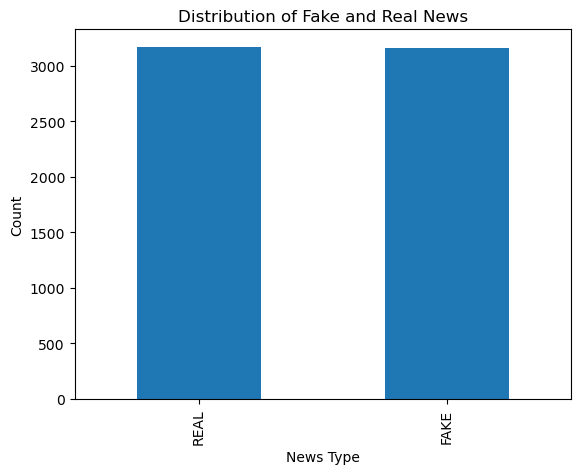

In [4]:
plt.figure()
df['label'].value_counts().plot(kind='bar')
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Distribution of Fake and Real News")
plt.show()

### 5. Text cleaning function

In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

### 6. Apply cleaning

In [7]:
df['text'] = df['text'].apply(clean_text)

### 7. Feature and label separation

In [8]:
X = df['text']
y = df['label']

### 8. TF-IDF Vectorization

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)

### 9. Train-Test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

### 10. Train logistic regression model

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 11. Predictions

In [12]:
y_pred = model.predict(X_test)

### 12. Model evaluation

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9131807419100236

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.89      0.94      0.91       628
        REAL       0.94      0.88      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



### 13. Confusion matrix

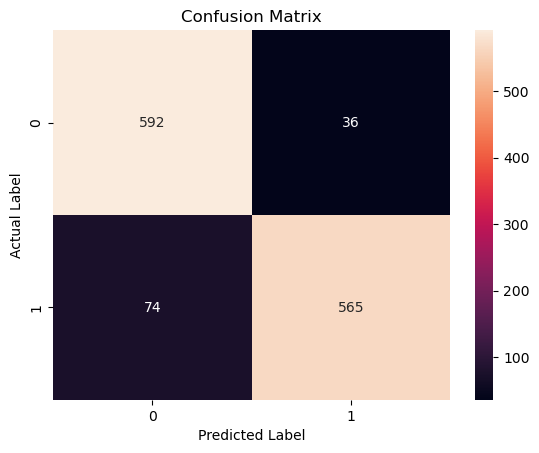

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

### 14. Test with custom news

In [15]:
sample_news = ["Government launches new employment scheme for youth"]
sample_clean = [clean_text(sample_news[0])]
sample_vector = vectorizer.transform(sample_clean)

prediction = model.predict(sample_vector)
print("Prediction:", prediction[0])

Prediction: FAKE
